# Part 1: Optimising functions
    
In this lab we will play with some of the optimisation methods we learned in the lecture by exploring how they work on some analytic functions (both convex and non-convex).

In [77]:
import torch
z = torch.tensor(2.0, requires_grad = True)
x = torch.tensor(0.25, requires_grad = True)

for epoch in range(4):
    if epoch%2==0:
        z = torch.cos(z+x)
z.backward()
print(x.grad.item())

0.0819406509399414


In [12]:
import torch
import torch.optim as optim

## A Simple Function

For this first task, we are going to try to optimise the following using Stochastic Gradient Descent:

\begin{equation}
min_{\textbf{x}} (\textbf{x}[0] - 5)^2 + \textbf{x}[1]^2 + (\textbf{x}[2] - 1)^2\; ,
\end{equation}

Use the following block the write down the analytic minima of the above function:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Implement the function

First, complete the following code block to implement the above function using PyTorch:

In [15]:
def function(x):
    # YOUR CODE HERE
    return((x[0]-5)**2+x[1]**2+(x[2]-1)**2)
    raise NotImplementedError()

### Optimising

We need two more things before we can start optimising.
We need our initial guess - which we've set to [2.0, 1.0, 10.0] and we need to how many epochs to take.

In [16]:
p = torch.tensor([2.0, 1.0, 10.0], requires_grad=True)
epochs = 5000

We define the optimisation loop in the standard way:

In [17]:
opt = optim.SGD([p], lr=0.001)

for i in range(epochs):
    opt.zero_grad()
    output = function(p)
    output.backward()
    opt.step()

Use the following block to print out the final value of `p`. Does it match the value you expected?

In [18]:
print(p.data)
# raise NotImplementedError()

tensor([4.9999e+00, 4.4948e-05, 1.0004e+00])


## Visualising Himmelblau's Function

We'll now have a go at a more complex example, which we also visualise, with multiple optima; [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function). This is defined as:

\begin{equation}
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2\; ,
\end{equation}
and has minima at
\begin{equation}
f(3, 2) = f(-2.805118, 3.131312) = f(-3.779310, -3.283186) = f(3.584428, -1.848126) = 0\; .
\end{equation}

Use the following block to first define the function (the inputs $x, y$ are packed into a vector as for the previous quadratic function above):

In [19]:
def himm(x):
    # YOUR CODE HERE
    return ((x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2)
    raise NotImplementedError()

The following will plot its surface:

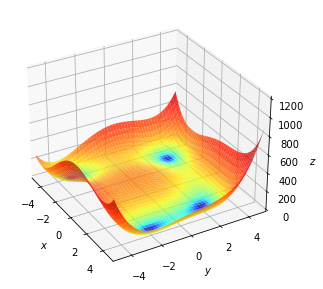

In [20]:
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = [x,y]
z = himm(torch.tensor(z)).numpy()

fig = plt.figure(figsize=(8, 5))
#elev:up and down; azim:left and right
ax = plt.axes(projection='3d', elev=30, azim=-30)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.set_zlim(0, 1200)

plt.show()

Check that the above plot looks correct  by comparing to the picture on the [Wikipedia page](https://en.wikipedia.org/wiki/Himmelblau%27s_function).

### Optimising

Let's see how it looks for a few different optimisers from a range of starting points

tensor([170.], grad_fn=<AddBackward0>)
tensor([162.1841], grad_fn=<AddBackward0>)
tensor([149.1809], grad_fn=<AddBackward0>)
tensor([128.6832], grad_fn=<AddBackward0>)
tensor([99.5340], grad_fn=<AddBackward0>)
tensor([64.7174], grad_fn=<AddBackward0>)
tensor([32.8369], grad_fn=<AddBackward0>)
tensor([12.4562], grad_fn=<AddBackward0>)
tensor([3.8841], grad_fn=<AddBackward0>)
tensor([1.3361], grad_fn=<AddBackward0>)
tensor([0.5801], grad_fn=<AddBackward0>)
tensor([0.2834], grad_fn=<AddBackward0>)
tensor([0.1447], grad_fn=<AddBackward0>)
tensor([0.0756], grad_fn=<AddBackward0>)
tensor([0.0401], grad_fn=<AddBackward0>)
tensor([0.0215], grad_fn=<AddBackward0>)
tensor([0.0116], grad_fn=<AddBackward0>)
tensor([0.0063], grad_fn=<AddBackward0>)
tensor([0.0034], grad_fn=<AddBackward0>)
tensor([0.0019], grad_fn=<AddBackward0>)
tensor([0.0010], grad_fn=<AddBackward0>)
tensor([0.0006], grad_fn=<AddBackward0>)
tensor([0.0003], grad_fn=<AddBackward0>)
tensor([0.0002], grad_fn=<AddBackward0>)
tensor([

(-5.0, 5.0)

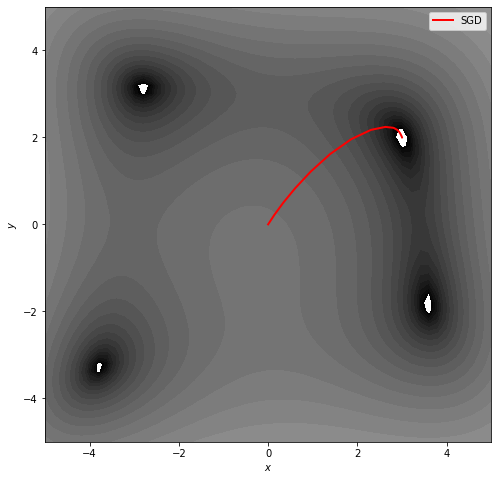

In [21]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = [x, y]
z = himm(torch.tensor(z)).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[0.0],[0.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)

for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    print(output)
    path = np.append(path, p.data.numpy(), axis=1)

print(path)
ax.plot(path[0], path[1], color='red', label='SGD', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

Use the following block to run SGD with momentum (lr=0.01, momentum=0.9) from the same initial point, saving the position at each timestep into a variable called `path_mom`.

In [68]:
p = torch.tensor([[0.0],[0.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01,momentum=0.9)

path_mom = np.empty((2,0))
path_mom = np.append(path, p.data.numpy(), axis=1)

for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    path_mom = np.append(path, p.data.numpy(), axis=1)

print(path_mom)

[[ 0.          0.14        0.33649024  0.60472417  0.95600182  1.38653016
   1.86050391  2.30184865  2.62639427  2.80893207  2.89414978  2.93415141
   2.95571637  2.96898317  2.97781301  2.9839375   2.9882834   2.99141002
   2.99367952  2.99533772  2.99655437  2.99745011  2.99811125  2.99859977
   2.99896145  2.99922943  2.99942803  2.99957538  2.99968457  2.99976563
   2.99982595  2.99987078  2.99990416  2.99992871  2.99994707  2.99996066
   2.99997067  2.9999783   2.99998379  2.99998808  2.99999118  2.99999332
   2.99999499  2.99999619  2.99999738  2.99999785  2.99999833  2.99999881
   2.99999905  2.99999928  2.99999928  3.53342199]
 [ 0.          0.22        0.49515006  0.83010411  1.21565795  1.61510217
   1.9584806   2.17222404  2.24103642  2.22011185  2.17238522  2.12811327
   2.09395194  2.0688405   2.0505538   2.03721929  2.02746153  2.02029634
   2.01501989  2.01112604  2.00824761  2.00611711  2.00453877  2.00336862
   2.00250077  2.0018568   2.00137877  2.00102401  2.00076056

The following will plot the path taken when momentum was used, as well as the original plain SGD path:

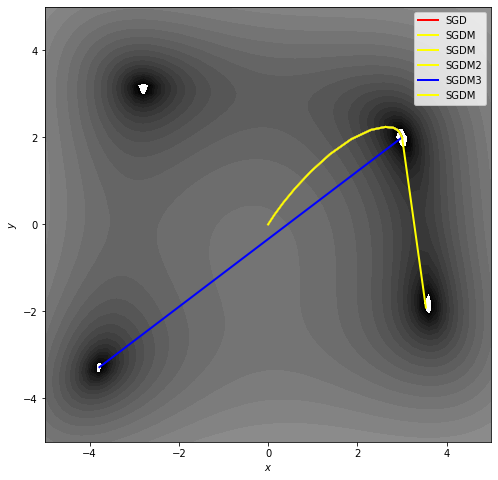

In [69]:
ax.plot(path_mom[0], path_mom[1], color='yellow', label='SGDM', linewidth=2)
ax.legend()
fig

Now explore what happens when you start from different points. What effect do you get with different optimisers? 

[[ 0.          0.14        0.33649024  0.60472417  0.95600182  1.38653016
   1.86050391  2.30184865  2.62639427  2.80893207  2.89414978  2.93415141
   2.95571637  2.96898317  2.97781301  2.9839375   2.9882834   2.99141002
   2.99367952  2.99533772  2.99655437  2.99745011  2.99811125  2.99859977
   2.99896145  2.99922943  2.99942803  2.99957538  2.99968457  2.99976563
   2.99982595  2.99987078  2.99990416  2.99992871  2.99994707  2.99996066
   2.99997067  2.9999783   2.99998379  2.99998808  2.99999118  2.99999332
   2.99999499  2.99999619  2.99999738  2.99999785  2.99999833  2.99999881
   2.99999905  2.99999928  2.99999928 -3.77931023]
 [ 0.          0.22        0.49515006  0.83010411  1.21565795  1.61510217
   1.9584806   2.17222404  2.24103642  2.22011185  2.17238522  2.12811327
   2.09395194  2.0688405   2.0505538   2.03721929  2.02746153  2.02029634
   2.01501989  2.01112604  2.00824761  2.00611711  2.00453877  2.00336862
   2.00250077  2.0018568   2.00137877  2.00102401  2.00076056

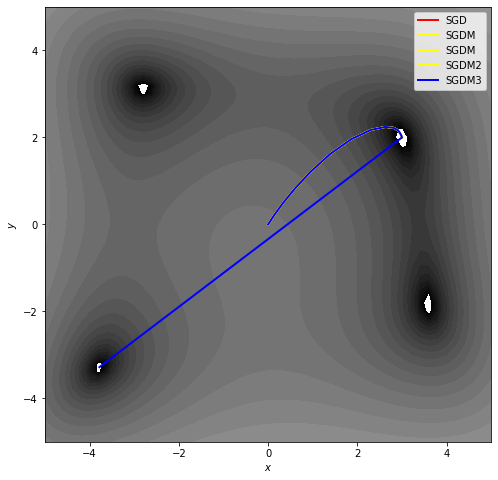

In [67]:
p = torch.tensor([[-2.0],[-2.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)

path_mom = np.empty((2,0))
path_mom = np.append(path, p.data.numpy(), axis=1)

for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    path_mom = np.append(path, p.data.numpy(), axis=1)

print(path_mom)
ax.plot(path_mom[0], path_mom[1], color='blue', label='SGDM3', linewidth=2)
ax.legend()
fig

# Linear Support Vector Machine (SVM)

We've now seen how to optimise analytic functions using PyTorch's optimisers, and in the previous labs and exercises we played with training simple machine learning models with hand-coded gradient descent. Let's put everything together and implement a Soft-Margin Linear Support Vector Machine, which we'll train on some artifically generated data using a range of optimisers.

In [23]:
# We're going to use a library called celluloid to make animations that work on colab
try: 
    from celluloid import Camera
except:
    !pip install celluloid

from IPython.display import HTML
import torch
import torch.optim as optim

## SVM Recap

Recall that an SVM tries to find the maximum margin hyperplane which separates the data classes. For a soft margin SVM
where $\textbf{x}$ is our data, we minimize:

\begin{equation}
\left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\textbf{w}\cdot \textbf{x}_i - b)\right) \right] + \lambda\lVert \textbf{w} \rVert^2
\end{equation}

We can formulate this as an optimization over our weights $\textbf{w}$ and bias $b$, where we minimize the
hinge loss subject to a level 2 weight decay term. The hinge loss for some model outputs
$z = \textbf{w}\textbf{x} + b$ with targets $y$ is given by:

\begin{equation}
\ell(y,z) = \max\left(0, 1 - yz \right)
\end{equation}

First, complete the following function to implement the hinge loss for batches of predictions `y_pred` and targets `y_true`. You should return the mean of the hinge loss across the batch. Note that this is a binary problem with labels are chosen to be $\{-1,1\}$.

In [69]:
def hinge_loss(y_pred, y_true):
    N = y_true.size()[0]
    l = 1 - y_pred*y_true
    O = torch.zeros(N)
    loss = torch.max(l,O)
    e = torch.sum(loss)/N
    return e

## Defining the SVM

Defining the SVM is pretty simple - it's just a basic linear classifier like a Perceptron; what distinguishes it is the loss.  We'll wrap it up in a function:

In [25]:
def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

Creating Synthetic Data
-----------------------------------------------

Now for some data, 1024 samples should do the trick. We normalise here so that our random init is in the same space as
the data:

In [26]:
import numpy as np
from sklearn.datasets import make_blobs

#Generate Test Data of Clusters: Data X and Target Y
X, Y = make_blobs(n_samples=1024, centers=2, cluster_std=1.2, random_state=1)
X = (X - X.mean()) / X.std()
Y[np.where(Y == 0)] = -1
X, Y = torch.FloatTensor(X), torch.FloatTensor(Y)
print(X,Y)
print(X.size())
print(Y.size())

tensor([[ 0.0908,  1.2707],
        [ 0.1552,  1.6161],
        [-1.5526, -0.2490],
        ...,
        [-0.1173,  1.6335],
        [ 0.2541,  1.3813],
        [ 0.3465,  1.8740]]) tensor([-1., -1.,  1.,  ..., -1., -1., -1.])
torch.Size([1024, 2])
torch.Size([1024])


For the first time, we're going to do proper mini-batch gradient descent. As such, we actually need to be able to produce batches of data. PyTorch has the concept of datasets (which represent entire collections of data) and data loaders (which allow us to iterate batches of data from a dataset). This allows the framework to do all the hard work for us:

In [27]:
from torch.utils import data

dataset = data.TensorDataset(X,Y) # create your datset
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True) # create your dataloader

In [28]:
for batch in dataloader:
    print(batch)
    print(X)
    print(Y)

[tensor([[-1.1364, -0.1985],
        [-1.5526, -0.2490],
        [-1.3466,  0.5538],
        [ 0.0382,  1.6382],
        [-0.0926,  0.9555],
        [-1.0983,  0.1477],
        [-0.1395,  1.2529],
        [-0.8861, -0.1504],
        [ 0.0749,  0.8322],
        [-1.6619, -0.3373],
        [ 0.0329,  1.6072],
        [-1.1193, -0.2488],
        [ 0.5623,  1.3791],
        [ 0.0687,  1.5125],
        [-1.2189,  0.0666],
        [ 0.5579,  1.0941],
        [ 0.3107,  1.6093],
        [-1.2991,  0.0196],
        [ 0.1130,  1.1886],
        [ 0.2308,  1.5631],
        [-1.4601, -0.5017],
        [-1.6075, -0.2497],
        [ 0.3203,  1.0383],
        [-1.1835, -0.1342],
        [-1.3472, -0.4942],
        [-1.5260,  0.0324],
        [-0.0587,  1.2035],
        [-0.1225,  1.3194],
        [ 0.1242,  1.1845],
        [-0.1101,  1.6105],
        [ 0.2934,  1.7742],
        [-1.6571, -0.1990]]), tensor([ 1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
         1., -1., -1., 

Visualizing the Training
----------------------------------------

We now aim to create a nice visualisation, such as the one below, that shows what happens as our SVM learns.

![svmgif](https://raw.githubusercontent.com/ecs-vlc/torchbearer/master/docs/_static/img/svm_fit.gif)

The code for the visualisation (using [pyplot](https://matplotlib.org/api/pyplot_api.html)) is a bit ugly but we'll
try to explain it to some degree. First, we need a mesh grid `xy` over the range of our data:

In [29]:
delta = 0.01
x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
x, y = np.meshgrid(x, y)
xy = list(map(np.ravel, [x, y]))

Now things get a little strange. We start by evaluating our model over the mesh grid from earlier.

For our outputs $z \in \textbf{Z}$, we can make some observations about the decision boundary. First, that we are
outside the margin if $z \lt -1$ or $z \gt 1$. Conversely, we are inside the margine where $z \gt -1$
or $z \lt 1$. 

This whole process is shown in the function below, which we can call at the end of every epoch. The `camera` takes snapshots of the current plot and is used later to render a video.

In [30]:
import matplotlib
import matplotlib.pyplot as plt

def draw_margin(w, b, camera):
    w = w.data.numpy()
    b = b.data.numpy()

    z = (w.dot(xy) + b).reshape(x.shape)
    z[np.where(z > 1.)] = 4
    z[np.where((z > 0.) & (z <= 1.))] = 3
    z[np.where((z > -1.) & (z <= 0.))] = 2
    z[np.where(z <= -1.)] = 1

    plt.scatter(x=X[:, 0], y=X[:, 1], c="black", s=10)
    plt.contourf(x, y, z, cmap=plt.cm.jet, alpha=0.5)
    camera.snap()

Since we don't know that our data is linearly separable, we would like to use a soft-margin SVM. That is, an SVM for
which the data does not all have to be outside of the margin. This takes the form of a weight decay term,
$\lambda\lVert \textbf{w} \rVert^2$ in the above equation. This term is called weight decay because the gradient
corresponds to subtracting some amount ($2\lambda\textbf{w}$) from our weights at each step. 

Most PyTorch optimisers actually have weight decay built in to them as an option (`weight_decay=...`), so its trivial to incorporate this. 

At this point we are ready to create and train our model. We've written most of the code, but you'll need to implement the forward and backward pass:

In [40]:
def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

In [72]:
# Set up drawing
from skimage.data import camera
fig = plt.figure(figsize=(5, 5))
camera = Camera(fig)

w = torch.randn(1, 2, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w)
print(b)
opt = optim.SGD([w,b], lr=0.1, weight_decay=0.01)

for epoch in range(50):
    for batch in dataloader:
        opt.zero_grad()
        H = svm(X, w, b)
        loss = hinge_loss(H, Y)
        loss.backward()
        opt.step()
#         print(loss)
    print(loss)
#     draw_margin(w, b, camera)
    
# create the animation and display it
# anim = camera.animate()
# plt.close()
# HTML(anim.to_html5_video())

tensor([[0.8772, 0.4141]], requires_grad=True)
tensor([0.6570], requires_grad=True)
tensor(0.0216, grad_fn=<DivBackward0>)
tensor(0.0096, grad_fn=<DivBackward0>)
tensor(0.0071, grad_fn=<DivBackward0>)
tensor(0.0061, grad_fn=<DivBackward0>)
tensor(0.0055, grad_fn=<DivBackward0>)
tensor(0.0052, grad_fn=<DivBackward0>)
tensor(0.0049, grad_fn=<DivBackward0>)
tensor(0.0046, grad_fn=<DivBackward0>)
tensor(0.0044, grad_fn=<DivBackward0>)
tensor(0.0042, grad_fn=<DivBackward0>)
tensor(0.0040, grad_fn=<DivBackward0>)
tensor(0.0039, grad_fn=<DivBackward0>)
tensor(0.0039, grad_fn=<DivBackward0>)
tensor(0.0038, grad_fn=<DivBackward0>)
tensor(0.0038, grad_fn=<DivBackward0>)
tensor(0.0038, grad_fn=<DivBackward0>)
tensor(0.0038, grad_fn=<DivBackward0>)
tensor(0.0038, grad_fn=<DivBackward0>)
tensor(0.0037, grad_fn=<DivBackward0>)
tensor(0.0037, grad_fn=<DivBackward0>)
tensor(0.0037, grad_fn=<DivBackward0>)
tensor(0.0037, grad_fn=<DivBackward0>)
tensor(0.0037, grad_fn=<DivBackward0>)
tensor(0.0036, grad

<Figure size 360x360 with 0 Axes>

Now do some further experiments. What optimiser and parameters gets you to a good solution the quickest? Do you notice that when the model is near a solution it jitters around upon each step? Can you add some kind of learning rate decay or schedule from the `torch.optim.lr_scheduler` package to reduce the learning rate over time?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [24]:
import numpy as np
import torch
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob

In [25]:
# Rearranges matrix into a column vector

def im2col(image, block_size = (1,1), skip=1):

    rows, cols = image.shape
    vert_blocks = rows - block_size[0] + 1

    output_vectors = np.zeros((block_size[0] * block_size[1], cols * rows))
    itr = 0
    for row in range(rows):
        for col in range(cols):
            output_vectors[:, itr] = image[row: row + block_size[0], col: col + 1].ravel()
            itr += 1

    return output_vectors[:, ::skip]

# Performs function of Fig2 (left), creates data matrix X, and outputs the covariance of this matrix. 
# Requires input of ONE CHANNEL, not RGB

def one_channel_to_cov(image, filter_size):
    x, y = filter_size
    H, W = image.shape
    X = [0]*(x*y)
    for i in range(x):
        for j in range(y):
            
            X[y*i + j] = im2col(np.array(image[i:W+i-x+1, j:H+j-y+1]), )


    X = np.squeeze(np.asarray(X)).T

    u = np.mean(X)
    N = X.shape[0]

    X = (X-u).T @ X
    Cov = X / N
    
    return Cov

# This function is provided in the Network Deconvolution paper.
# Numerical approximation of inverse sqrt. Used to invertsqrt the Cov matrix to get Deconv matrix D.

def isqrt_newton_schulz_autograd(A, numIters):
    dim = A.shape[0]
    normA=A.norm()
    Y = A.div(normA)
    I = torch.eye(dim,dtype=A.dtype,device=A.device)
    Z = torch.eye(dim,dtype=A.dtype,device=A.device)

    for i in range(numIters):
        T = 0.5*(3.0*I - Z@Y)
        Y = Y@T
        Z = T@Z
    #A_sqrt = Y*torch.sqrt(normA)
    A_isqrt = Z / torch.sqrt(normA)
    return A_isqrt

# plot kernel in 3D
def plot_3D(ker):
    # Set up grid and test data
    nx, ny = 15, 15
    x = range(nx)
    y = range(ny)

    hf = plt.figure()
    ha = hf.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(x, y)  
    ha.plot_surface(X, Y, np.reshape(ker, (15,15)))

    plt.show()

################
# Executes above functions to take ONE CHANNEL input, return kernel (as a vector)

def channel_to_kernel(image, k):
  # Data Matrix X
    cov = one_channel_to_cov(image, (k, k))

    # Deconv matrix D is equal to inverse sqrt of cov matrix. 
    D = isqrt_newton_schulz_autograd(torch.Tensor(cov), 10)

    
    # Extract kernel from Deconv matrix
    ker = torch.diagonal(D)

    return ker

In [26]:
#SET FILTER SIZE
k = 15

In [27]:
# im_name must be string ending in .jpeg

def load_image(im_name, rows, cols, channels):
    #load image
    image = Image.open(im_name)
    # convert image to numpy array
    data = asarray(image)

    data_square = data
    #Resize to square, reduce size for computational efficiency
    data_square = np.resize(data_square, (rows, cols, channels))

    
    return data_square

In [42]:
# ImageNet 128 is a local folder containing 128 randomly selected JPEG images from ImageNet
filenames = glob.glob("resize-224/*.png")
# /Users/elliotstein/Documents/Semester 2/Deep Learning/ImageNet 128/*.png")

In [43]:
print(filenames)

['resize-224\\00000000_224resized.png', 'resize-224\\00000001_224resized.png', 'resize-224\\00000002_224resized.png', 'resize-224\\00000003_224resized.png', 'resize-224\\00000004_224resized.png', 'resize-224\\00000005_224resized.png', 'resize-224\\00000007_224resized.png', 'resize-224\\00000008_224resized.png', 'resize-224\\00000009_224resized.png', 'resize-224\\00000010_224resized.png', 'resize-224\\00000011_224resized.png', 'resize-224\\00000012_224resized.png', 'resize-224\\00000014_224resized.png', 'resize-224\\00000015_224resized.png', 'resize-224\\00000017_224resized.png', 'resize-224\\00000018_224resized.png', 'resize-224\\00000019_224resized.png', 'resize-224\\00000020_224resized.png', 'resize-224\\00000021_224resized.png', 'resize-224\\00000022_224resized.png', 'resize-224\\00000023_224resized.png', 'resize-224\\00000025_224resized.png', 'resize-224\\00000027_224resized.png', 'resize-224\\00000028_224resized.png', 'resize-224\\00000029_224resized.png', 'resize-224\\00000030_22

In [44]:
# Create dictionary storing all images
# Each image is formatted by the load_image function, stored under name data1, data2 etc.
d = {}
N = len(filenames)
for x in range(N):
    d["data{0}".format(x)] = load_image(filenames[x], 224, 224, 3)
    
    
RGB = ['Red', 'Green', 'Blue']
for i in range(3):
    # Reset and initialise ker variable for storing kernel
    ker = None
    ker = torch.zeros((k,k))    
    
    for x in range(N):
        print(RGB[i], ': ', x, "/", N)
        
        
        # Takes individual RGB channel from image, creates deconvolutional kernel and adds to ker
        ker+=torch.Tensor(channel_to_kernel(d["data{0}".format(5)][:,:,i], k)).reshape(15,15)
             
        # Stores three variables, one for each of the RGB channels. Each is the average over all image 
        # deconvolutional kernels
    if i == 0:
        ker0 = ker/N
    if i == 1:
        ker1 = ker/N
    if i == 2:
        ker2 = ker/N

Red :  0 / 128
Red :  1 / 128
Red :  2 / 128
Red :  3 / 128
Red :  4 / 128
Red :  5 / 128
Red :  6 / 128
Red :  7 / 128
Red :  8 / 128
Red :  9 / 128
Red :  10 / 128
Red :  11 / 128
Red :  12 / 128
Red :  13 / 128
Red :  14 / 128
Red :  15 / 128
Red :  16 / 128
Red :  17 / 128
Red :  18 / 128
Red :  19 / 128
Red :  20 / 128
Red :  21 / 128
Red :  22 / 128
Red :  23 / 128
Red :  24 / 128
Red :  25 / 128
Red :  26 / 128
Red :  27 / 128
Red :  28 / 128
Red :  29 / 128
Red :  30 / 128
Red :  31 / 128
Red :  32 / 128
Red :  33 / 128
Red :  34 / 128
Red :  35 / 128
Red :  36 / 128
Red :  37 / 128
Red :  38 / 128
Red :  39 / 128
Red :  40 / 128
Red :  41 / 128
Red :  42 / 128
Red :  43 / 128
Red :  44 / 128
Red :  45 / 128
Red :  46 / 128
Red :  47 / 128
Red :  48 / 128
Red :  49 / 128
Red :  50 / 128
Red :  51 / 128
Red :  52 / 128
Red :  53 / 128
Red :  54 / 128
Red :  55 / 128
Red :  56 / 128
Red :  57 / 128
Red :  58 / 128
Red :  59 / 128
Red :  60 / 128
Red :  61 / 128
Red :  62 / 128
Re

Red Channel Deconv Kernel


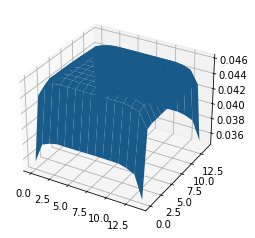

Green Channel Deconv Kernel


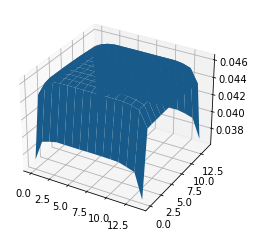

Blue Channel Deconv Kernel


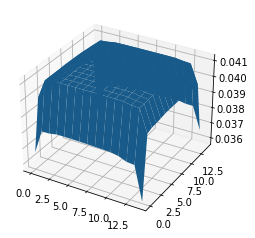

In [45]:
print('Red Channel Deconv Kernel')
plot_3D(np.array(ker0))
print('Green Channel Deconv Kernel')
plot_3D(np.array(ker1))
print('Blue Channel Deconv Kernel')
plot_3D(np.array(ker2))